In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os


zip_path = "/content/drive/MyDrive/raw_data/PRAICP-1002-TrafSignDetc.zip"
extract_path = "/content/drive/MyDrive/traffic_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted Files:", os.listdir(extract_path))

Extracted Files: ['Meta.csv', 'Meta', 'Test.csv', 'Test', 'Train.csv', 'Train', 'meta', 'test', 'train']


In [ ]:
!ls /content/drive/MyDrive/traffic_data/

meta  Meta  Meta.csv  test  Test  Test.csv  train  Train  Train.csv


In [ ]:
import pandas as pd

# Path to the training CSV
train_csv_path = '/content/drive/MyDrive/tafficdata/Train.csv'

# Load the CSV
train_df = pd.read_csv("/content/drive/MyDrive/traffic_data/Train.csv")

# Show the first few rows
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [ ]:
import os

# Example missing image path
image_path = "/content/drive/MyDrive/traffic_data/Train/38/00038_00037_00013.png"

# Check if it exists
print("Image exists:", os.path.exists(image_path))

train_df['Path'].head(10)
for path in train_df['Path'].head(10):
    full_path = os.path.join('/content/drive/MyDrive/traffic_data/', path)
    print(full_path, "Exists:", os.path.exists(full_path))

Image exists: True
/content/drive/MyDrive/traffic_data/Train/20/00020_00000_00000.png Exists: True
/content/drive/MyDrive/traffic_data/Train/20/00020_00000_00001.png Exists: True
/content/drive/MyDrive/traffic_data/Train/20/00020_00000_00002.png Exists: True
/content/drive/MyDrive/traffic_data/Train/20/00020_00000_00003.png Exists: True
/content/drive/MyDrive/traffic_data/Train/20/00020_00000_00004.png Exists: True
/content/drive/MyDrive/traffic_data/Train/20/00020_00000_00005.png Exists: True
/content/drive/MyDrive/traffic_data/Train/20/00020_00000_00006.png Exists: True
/content/drive/MyDrive/traffic_data/Train/20/00020_00000_00007.png Exists: True
/content/drive/MyDrive/traffic_data/Train/20/00020_00000_00008.png Exists: True
/content/drive/MyDrive/traffic_data/Train/20/00020_00000_00009.png Exists: True


In [ ]:
import os

# Path of the "missing" image
missing_image_path = "/content/drive/MyDrive/traffic_data/Train/38/00038_00037_00013.png"

# Check if the file exists and its size
print("Exists:", os.path.exists(missing_image_path))
if os.path.exists(missing_image_path):
    print("File size:", os.path.getsize(missing_image_path), "bytes")

Exists: True
File size: 3657 bytes


In [ ]:

# Base directory for traffic sign dataset
base_dir = '/content/drive/MyDrive/traffic_data/'

# Paths to CSV files
train_csv_path = base_dir + 'Train.csv'
test_csv_path = base_dir + 'Test.csv'
meta_csv_path = base_dir + 'Meta.csv'

# Check directory structure
import os
print("Files in traffic_data folder:", os.listdir(base_dir))

# Check Train folder
train_folder = os.path.join(base_dir, 'Train')
print("Train folder exists:", os.path.exists(train_folder))
print("Folders in Train directory:", os.listdir(train_folder)[:5])  # List some class folders

import pandas as pd

# Load train data
train_df = pd.read_csv(train_csv_path)

# Inspect the first few rows
print(train_df.head())

# Check columns
print(train_df.columns)

# Clean up the 'Path' column to avoid hidden spaces or incorrect slashes
train_df['Path'] = train_df['Path'].str.strip().str.replace('\\', '/')

# Full image paths
train_df['FullPath'] = base_dir + train_df['Path']

# Check if the paths look correct
print(train_df.head())

# Check for missing images
missing_files = []

for path in train_df['FullPath']:
    if not os.path.exists(path):
        missing_files.append(path)

print(f"Total missing files: {len(missing_files)}")
print("Some missing files:", missing_files[:5])

from PIL import Image

# Pick a random image that exists
sample_image_path = train_df['FullPath'].iloc[0]

# Open and show the image
if os.path.exists(sample_image_path):
    image = Image.open(sample_image_path)
    image.show()
else:
    print("Sample image not found:", sample_image_path)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_df['ClassId'] = train_df['ClassId'].astype(str)

# Image data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=False
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=base_dir,          # Base directory
    x_col='Path',                # Path is relative to base_dir
    y_col='ClassId',             # Target column
    target_size=(224, 224),      # Image size
    batch_size=32,
    class_mode='categorical',    # Multi-class classification
    shuffle=True
)

# Flowing from dataframe
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=base_dir,          # Base directory
    x_col='Path',                # Path is relative to base_dir
    y_col='ClassId',             # Target column
    target_size=(224, 224),      # Image size
    batch_size=32,
    class_mode='categorical',    # Multi-class classification
    shuffle=True
)

Files in traffic_data folder: ['Meta.csv', 'Meta', 'Test.csv', 'Test', 'Train.csv', 'Train', 'meta', 'test', 'train']
Train folder exists: True
Folders in Train directory: ['0', '1', '10', '11', '12']
   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png  
Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')
   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get class distribution
class_counts = train_df['ClassId'].value_counts().sort_index()
total_samples = len(train_df)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['ClassId']),
    y=train_df['ClassId']
)

class_weight_dict = dict(enumerate(class_weights))

print("Class weights:", class_weight_dict)

Class weights: {0: 4.342081949058693, 1: 0.41073748166771423, 2: 0.45365035288672917, 3: 0.6907857646229739, 4: 0.4342081949058693, 5: 0.4221468561584841, 6: 1.1690220632081096, 7: 1.447360649686231, 8: 2.1710409745293466, 9: 0.8214749633354285, 10: 0.7598643410852713, 11: 4.342081949058693, 12: 0.4052609819121447, 13: 2.5328811369509046, 14: 2.7631430584918957, 15: 2.3380441264162193, 16: 1.7879160966712266, 17: 3.3771748492678726, 18: 0.6078914728682171, 19: 1.5197286821705427, 20: 3.7993217054263564, 21: 1.6885874246339363, 22: 3.3771748492678726, 23: 0.6466930562427841, 24: 2.0263049095607237, 25: 1.1690220632081096, 26: 3.7993217054263564, 27: 1.3234212036318223, 28: 2.1710409745293466, 29: 0.7598643410852713, 30: 2.3380441264162193, 31: 4.342081949058693, 32: 0.44050106729580946, 33: 3.0394573643410854, 34: 0.46052384308198263, 35: 2.5328811369509046, 36: 3.7993217054263564, 37: 3.7993217054263564, 38: 0.49023505876469115, 39: 2.1710409745293466, 40: 0.6332202842377261, 41: 0.646

In [ ]:
import os
import shutil
import pandas as pd

# Paths
test_csv = '/content/drive/MyDrive/traffic_data/Test.csv'
test_folder = '/content/drive/MyDrive/traffic_data/Test'
organized_test_folder = '/content/drive/MyDrive/traffic_data/Organized_Test'

# Read the test CSV
test_df = pd.read_csv(test_csv)

# Create organized test folder if it doesn't exist
os.makedirs(organized_test_folder, exist_ok=True)

# Go through each row in the CSV and move files into class-specific folders
for _, row in test_df.iterrows():
    class_id = str(row['ClassId'])
    image_path = os.path.join(test_folder, os.path.basename(row['Path']))
    class_folder = os.path.join(organized_test_folder, class_id)

    # Create class folder if it doesn't exist
    os.makedirs(class_folder, exist_ok=True)

    # Move the image to the class folder
    if os.path.exists(image_path):
        shutil.move(image_path, os.path.join(class_folder, os.path.basename(image_path)))

print('Test folder organized successfully!')

Test folder organized successfully!


Found 39209 images belonging to 43 classes.
Found 12630 images belonging to 43 classes.


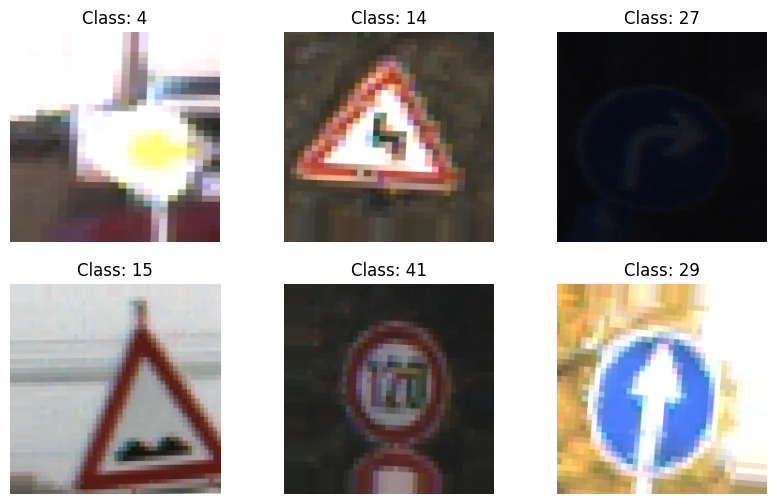

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Updated data augmentation without unsupported arguments
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,       # Slightly increased rotation
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,          # Slightly more zoom
    horizontal_flip=True,
    brightness_range=[0.9, 1.5] # Wider brightness range
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation data
train_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/traffic_data/Train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/traffic_data/Organized_Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Visualize the images again
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(train_generator)

plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {np.argmax(labels[i])}")
    plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
# Training
# Validation data: only rescale
val_datagen = ImageDataGenerator(rescale=1./255)

# Paths to data
train_dir = '/content/drive/MyDrive/traffic_data/Train'
val_dir = '/content/drive/MyDrive/traffic_data/Organized_Test'

# Load training and validation data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 39209 images belonging to 43 classes.
Found 12630 images belonging to 43 classes.


In [ ]:
# Model Development

# Load EfficientNetB0 without the top layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers on top
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(43, activation='softmax')(x)  # 43 classes in the traffic sign dataset

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled successfully..!!")

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Model compiled successfully..!!


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight

# Paths
dataset_path = "/content/drive/MyDrive/traffic_data"
train_dir = os.path.join(dataset_path, 'Train')
test_dir = os.path.join(dataset_path, 'Organized_Test')

# Image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load train and validation data
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Compute class weights to handle class imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_data.classes),
    y=train_data.classes
)
class_weights = dict(enumerate(class_weights))

# EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze some layers for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:100]:  # Freeze first 100 layers
    layer.trainable = False

# Custom classification head
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight

# Paths
dataset_path = "/content/drive/MyDrive/traffic_data"
train_dir = os.path.join(dataset_path, 'Train')
test_dir = os.path.join(dataset_path, 'Test')

# Image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load train and validation data
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Compute class weights to handle class imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_data.classes),
    y=train_data.classes
)
class_weights = dict(enumerate(class_weights))

# EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze some layers for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:100]:  # Freeze first 100 layers
    layer.trainable = False

# Custom classification head
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
checkpoint = ModelCheckpoint('efficientnet_best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

callbacks = [early_stopping, reduce_lr, checkpoint]

# Train the model
history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=25,
                    class_weight=class_weights,
                    callbacks=callbacks)

# Save the trained model
model.save("/content/drive/MyDrive/traffic_models/efficientnet_final_model.h5")
model.save("/content/drive/MyDrive/traffic_models/efficientnet_final_model.keras")

print("model trained and saved successfully")

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.0497 - loss: 3.5807
Epoch 1: val_accuracy improved from -inf to 0.03558, saving model to efficientnet_best_model.h5


981/981 ━━━━━━━━━━━━━━━━━━━━ 723s 682ms/step - accuracy: 0.0497 - loss: 3.5805 - val_accuracy: 0.0356 - val_loss: 5.1949 - learning_rate: 1.0000e-04
Epoch 2/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.2632 - loss: 2.4711
Epoch 2: val_accuracy improved from 0.03558 to 0.25430, saving model to efficientnet_best_model.h5


981/981 ━━━━━━━━━━━━━━━━━━━━ 625s 637ms/step - accuracy: 0.2632 - loss: 2.4708 - val_accuracy: 0.2543 - val_loss: 2.7589 - learning_rate: 1.0000e-04
Epoch 3/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.5409 - loss: 1.3789
Epoch 3: val_accuracy improved from 0.25430 to 0.51805, saving model to efficientnet_best_model.h5


981/981 ━━━━━━━━━━━━━━━━━━━━ 632s 644ms/step - accuracy: 0.5409 - loss: 1.3787 - val_accuracy: 0.5180 - val_loss: 1.4985 - learning_rate: 1.0000e-04
Epoch 4/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.7103 - loss: 0.7699
Epoch 4: val_accuracy improved from 0.51805 to 0.54317, saving model to efficientnet_best_model.h5


981/981 ━━━━━━━━━━━━━━━━━━━━ 615s 627ms/step - accuracy: 0.7103 - loss: 0.7698 - val_accuracy: 0.5432 - val_loss: 1.8215 - learning_rate: 1.0000e-04
Epoch 5/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - accuracy: 0.8048 - loss: 0.5238
Epoch 5: val_accuracy did not improve from 0.54317
981/981 ━━━━━━━━━━━━━━━━━━━━ 604s 616ms/step - accuracy: 0.8048 - loss: 0.5238 - val_accuracy: 0.5038 - val_loss: 2.1655 - learning_rate: 1.0000e-04
Epoch 6/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.8378 - loss: 0.4134
Epoch 6: val_accuracy improved from 0.54317 to 0.81928, saving model to efficientnet_best_model.h5


981/981 ━━━━━━━━━━━━━━━━━━━━ 603s 615ms/step - accuracy: 0.8378 - loss: 0.4134 - val_accuracy: 0.8193 - val_loss: 0.6064 - learning_rate: 1.0000e-04
Epoch 7/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.8785 - loss: 0.3077
Epoch 7: val_accuracy did not improve from 0.81928
981/981 ━━━━━━━━━━━━━━━━━━━━ 610s 621ms/step - accuracy: 0.8785 - loss: 0.3077 - val_accuracy: 0.7921 - val_loss: 0.7374 - learning_rate: 1.0000e-04
Epoch 8/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.8958 - loss: 0.2690
Epoch 8: val_accuracy did not improve from 0.81928
981/981 ━━━━━━━━━━━━━━━━━━━━ 583s 594ms/step - accuracy: 0.8958 - loss: 0.2690 - val_accuracy: 0.7063 - val_loss: 1.1190 - learning_rate: 1.0000e-04
Epoch 9/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.9093 - loss: 0.2400
Epoch 9: val_accuracy improved from 0.81928 to 0.84288, saving model to efficientnet_best_model.h5


981/981 ━━━━━━━━━━━━━━━━━━━━ 577s 588ms/step - accuracy: 0.9093 - loss: 0.2400 - val_accuracy: 0.8429 - val_loss: 0.5867 - learning_rate: 1.0000e-04
Epoch 10/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.9218 - loss: 0.1955
Epoch 10: val_accuracy did not improve from 0.84288
981/981 ━━━━━━━━━━━━━━━━━━━━ 584s 595ms/step - accuracy: 0.9218 - loss: 0.1955 - val_accuracy: 0.8410 - val_loss: 0.6016 - learning_rate: 1.0000e-04
Epoch 11/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.9299 - loss: 0.1884
Epoch 11: val_accuracy did not improve from 0.84288
981/981 ━━━━━━━━━━━━━━━━━━━━ 583s 595ms/step - accuracy: 0.9299 - loss: 0.1884 - val_accuracy: 0.8421 - val_loss: 0.6580 - learning_rate: 1.0000e-04
Epoch 12/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - accuracy: 0.9387 - loss: 0.1596
Epoch 12: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 12: val_accuracy did not improve from 0.84288
981/981 ━━━━━━━━━━━━━━━━━━━━ 586s 598ms/step - accur

981/981 ━━━━━━━━━━━━━━━━━━━━ 589s 600ms/step - accuracy: 0.9472 - loss: 0.1317 - val_accuracy: 0.8677 - val_loss: 0.5471 - learning_rate: 5.0000e-05
Epoch 14/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.9590 - loss: 0.0961
Epoch 14: val_accuracy improved from 0.86775 to 0.88649, saving model to efficientnet_best_model.h5


981/981 ━━━━━━━━━━━━━━━━━━━━ 578s 589ms/step - accuracy: 0.9590 - loss: 0.0961 - val_accuracy: 0.8865 - val_loss: 0.4818 - learning_rate: 5.0000e-05
Epoch 15/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.9614 - loss: 0.0985
Epoch 15: val_accuracy did not improve from 0.88649
981/981 ━━━━━━━━━━━━━━━━━━━━ 575s 586ms/step - accuracy: 0.9614 - loss: 0.0985 - val_accuracy: 0.8748 - val_loss: 0.5229 - learning_rate: 5.0000e-05
Epoch 16/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.9591 - loss: 0.1010
Epoch 16: val_accuracy improved from 0.88649 to 0.89415, saving model to efficientnet_best_model.h5


981/981 ━━━━━━━━━━━━━━━━━━━━ 578s 589ms/step - accuracy: 0.9591 - loss: 0.1010 - val_accuracy: 0.8941 - val_loss: 0.4606 - learning_rate: 5.0000e-05
Epoch 17/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - accuracy: 0.9653 - loss: 0.0878
Epoch 17: val_accuracy did not improve from 0.89415
981/981 ━━━━━━━━━━━━━━━━━━━━ 586s 597ms/step - accuracy: 0.9653 - loss: 0.0878 - val_accuracy: 0.8808 - val_loss: 0.5116 - learning_rate: 5.0000e-05
Epoch 18/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.9652 - loss: 0.0854
Epoch 18: val_accuracy did not improve from 0.89415
981/981 ━━━━━━━━━━━━━━━━━━━━ 588s 600ms/step - accuracy: 0.9652 - loss: 0.0854 - val_accuracy: 0.8861 - val_loss: 0.5312 - learning_rate: 5.0000e-05
Epoch 19/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.9689 - loss: 0.0788
Epoch 19: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.

Epoch 19: val_accuracy improved from 0.89415 to 0.89682, saving model to efficientnet_best_model.h5


981/981 ━━━━━━━━━━━━━━━━━━━━ 592s 603ms/step - accuracy: 0.9689 - loss: 0.0788 - val_accuracy: 0.8968 - val_loss: 0.4790 - learning_rate: 5.0000e-05
Epoch 20/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.9717 - loss: 0.0688
Epoch 20: val_accuracy did not improve from 0.89682
981/981 ━━━━━━━━━━━━━━━━━━━━ 585s 597ms/step - accuracy: 0.9717 - loss: 0.0688 - val_accuracy: 0.8926 - val_loss: 0.5083 - learning_rate: 2.5000e-05
Epoch 21/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - accuracy: 0.9753 - loss: 0.0604
Epoch 21: val_accuracy did not improve from 0.89682
981/981 ━━━━━━━━━━━━━━━━━━━━ 584s 596ms/step - accuracy: 0.9753 - loss: 0.0604 - val_accuracy: 0.8917 - val_loss: 0.5265 - learning_rate: 2.5000e-05


model trained and saved successfully


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight


# Paths
dataset_path = "/content/drive/MyDrive/traffic_data"
train_dir = os.path.join(dataset_path, 'Train')
# test_dir was incorrectly set to 'Test'. It should be 'Organized_Test'
test_dir = os.path.join(dataset_path, 'Organized_Test') # Changed this line

# Image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Evaluate on test data
test_data = datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Test Loss: {test_loss:.2f}")

model.save("/content/drive/MyDrive/traffic_models/efficientnet_final_evaluate_model.h5")
model.save("/content/drive/MyDrive/traffic_models/efficientnet_final_evaluate_model.keras")

Found 12630 images belonging to 43 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


395/395 ━━━━━━━━━━━━━━━━━━━━ 193s 488ms/step - accuracy: 0.9143 - loss: 0.3618


Test Accuracy: 0.89
Test Loss: 0.42


246/246 ━━━━━━━━━━━━━━━━━━━━ 115s 466ms/step


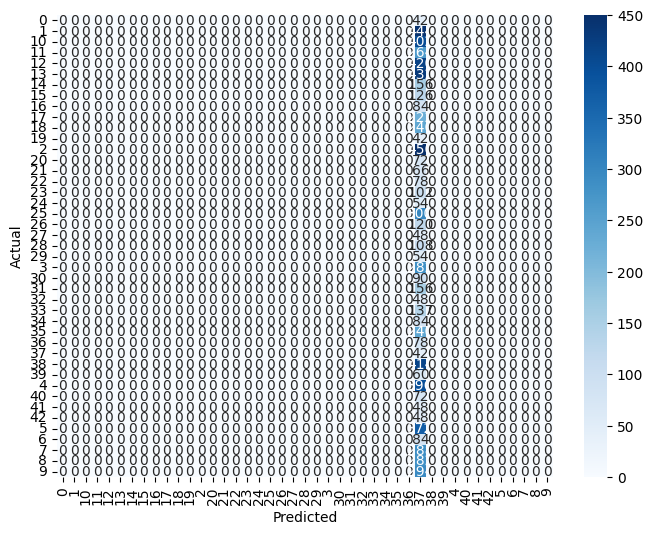

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Confusion Matrix
y_pred = np.argmax(model.predict(val_data), axis=1)
y_true = val_data.classes

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))

# Get class names from the validation data generator
class_names = list(val_data.class_indices.keys()) # This line is added

# Replace 'classes' with 'class_names' for xticklabels and yticklabels
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

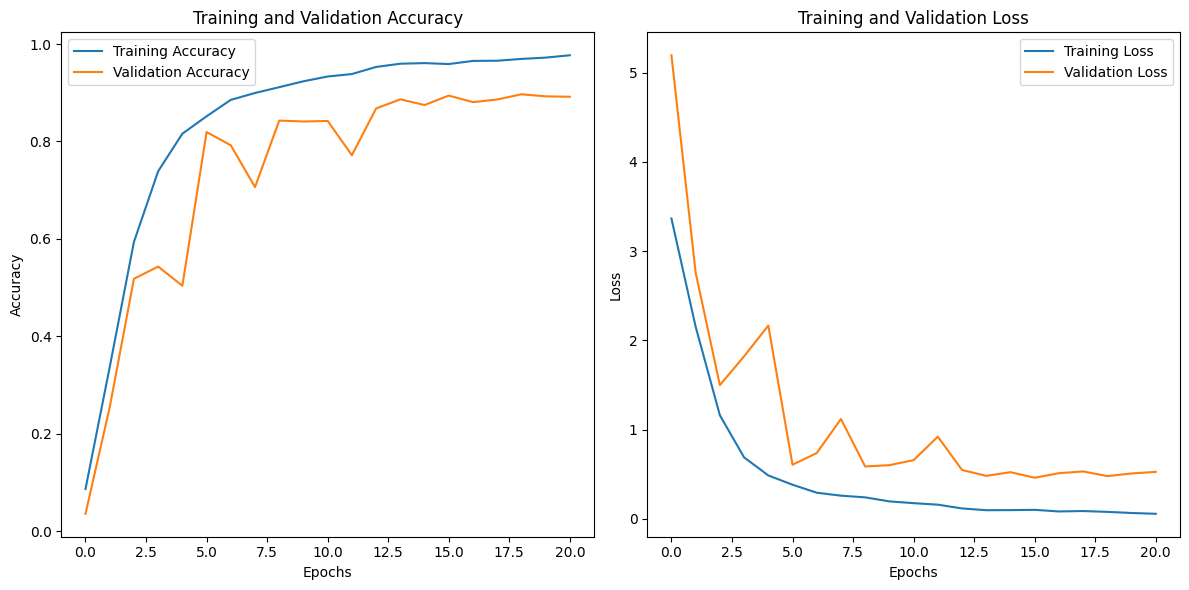

In [ ]:
import matplotlib.pyplot as plt

# Use the history object from the previous training (cell ipython-input-15-b92e22de3ac8)
# No need to call model.fit again

# Extracting training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()